<h1>IKEA</h1>

# Objective:
### The objective of this project is to perform exploratory data analysis (EDA) on the IKEA dataset and build a machine learning model to predict the prices of furniture items. The project will be divided into two main parts: EDA and price prediction/testing.

### Part 1: Exploratory Data Analysis (EDA)
#### In this part, we will analyze the dataset to gain insights and understanding of the data. The EDA will include:
#### - Data loading and initial exploration
#### - Data cleaning and preprocessing
#### - Data visualization using plots and charts
#### - Statistical analysis of the data
#### - Correlation analysis to identify relationships between variables

### Part 2: Price Prediction/Testing
#### In this part, we will build a machine learning model to predict the prices of furniture items based on the available features. The steps involved will be:
#### - Feature selection and preprocessing
##### - Splitting the dataset into training and testing sets
#### - Training different regression models such as Linear Regression, Decision Tree Regression, Random Forest Regression, Gradient Boosting Regression, SVR, and K-Nearest Neighbors Regression
#### - Evaluating the performance of each model using metrics like RMSE (Root Mean Squared Error) and R^2 score
#### - Selecting the best-performing model and using it to make price predictions on the test dataset

### Conclusion:
#### The project aims to gain insights from the IKEA dataset through EDA and develop a machine learning model for price prediction. The findings and predictions will provide valuable information for pricing strategies and decision-making in the furniture industry.

In [77]:
#Import libraries
import pandas as pd # for working with data in the form of tables
import seaborn as sns # for improved data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline # to visualize the data directly in the notebook
import scipy # for scientific computing and statistical analysis
from scipy.stats import stats # for statistical analysis
from scipy.stats import mannwhitneyu # to perform the Mann-Whitney test
from sklearn.model_selection import train_test_split # to split data into training and test sets
from sklearn.preprocessing import LabelEncoder # for encoding categorical variables
from sklearn import metrics # to calculate model evaluation metrics
from sklearn.metrics import accuracy_score # to calculate the accuracy of classification models
from sklearn.neighbors import KNeighborsClassifier # to build the k-nearest neighbors model (classification)
from sklearn.linear_model import LogisticRegression # to build a logistic regression model (classification)
from sklearn.tree import DecisionTreeClassifier # to build a decision tree model (classification)
from sklearn.linear_model import LinearRegression # to build a linear regression model (regression)
from sklearn.tree import DecisionTreeRegressor # to build a decision tree model (regression)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # for building random forest and gradient boosting models (regression)
from sklearn.svm import SVR # to build a support vector model (regression)
from sklearn.neighbors import KNeighborsRegressor # to build a k-nearest neighbors model (regression)
from sklearn.metrics import mean_squared_error # to calculate mean squared error (regression)
from sklearn.metrics import r2_score # to calculate the coefficient of determination (regression)

UsageError: unrecognized arguments: # to visualize the data directly in the notebook


In [78]:
#Loading the file
ikea = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')

In [79]:
# Display the upper values to familiarize yourself with the dataframe
ikea.head(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [80]:
# Display the lower values to familiarize yourself with the dataframe
ikea.tail(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3684,3684,49157565,ELVARLI,Wardrobes,1245.0,"SR 1,735",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.0,216.0,164.0
3685,3685,59324936,PAX / FORSAND,Wardrobes,2100.0,No old price,True,https://www.ikea.com/sa/en/p/pax-forsand-wardr...,Yes,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.0,236.0,100.0
3686,3686,69330475,PAX / HOKKSUND,Wardrobes,3985.0,No old price,True,https://www.ikea.com/sa/en/p/pax-hokksund-ward...,No,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,150.0
3687,3687,79302995,ELVARLI,Wardrobes,1611.0,"SR 1,815",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3688,3688,89330653,PAX / MEHAMN/AULI,Wardrobes,2045.0,No old price,True,https://www.ikea.com/sa/en/p/pax-mehamn-auli-w...,No,"Wardrobe combination, 200x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,200.0
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [81]:
#Display descriptive statistics by dataframe
ikea.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [82]:
#General information on the dataframe
ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [83]:
#Check for missing values 
ikea.isna().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [84]:
#Check for duplicates
ikea.duplicated().sum()

0

In [85]:
#View the number of columns and columns
ikea.shape

(3694, 14)

In [86]:
#View unique values by 'category' column
ikea['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)


>Dataframe contains 3694 rows and 14 columns, has empty values, has no duplicates.
<h4>Columns</h4>
  <li><b>item_id</b> - element id</li>
<li><b>name</b> - designer name</li>
<li><b>category</b> - furniture category</li>
<li><b>price</b> - product price </li>
<li><b>old_price</b> - item price before discount</li>
<li><b>sellable_online</b> - whether the product is available for purchase online</li>
<li><b>link </b> - product link</li>
<li><b>other_colors</b> - presence of other colors or only one color</li>
<li><b>short_description</b> - short description of the item</li>
<li><b>designer</b> - the name of the designer who designed the product </li>
<li><b>depth</b> - depth in centimeters</li>
<li><b>height</b> - height in centimeters</li>
<li><b>width</b> - width in centimeters</li>

In [87]:
#View unique values by 'other colors' column
ikea['other_colors'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
#View unique values by column 'sellable_online'
ikea['sellable_online'].unique()

array([ True, False])

In [89]:
#Number of products for each designer in the 'name' column
ikea.groupby('name').item_id.count().reset_index().sort_values(by='item_id', ascending=False)

,name,item_id
30,BESTÅ,173
412,PAX,111
163,GRÖNLID,83
22,BEKANT,74
545,TROFAST,74
...,...,...
445,RISATORP,1
191,HORNAVAN,1
449,RÅDVIKEN,1
186,HILVER / GODVIN,1


In [90]:
#View price statistics for each category
result_price = ikea.groupby('category').agg({
    "price": ["min", "mean", "max","sum","count"]
}).reset_index()

# Rename the columns to make it easier to reference
result_price.columns = ['category', 'min_price', 'mean_price', 'max_price', 'total_price', 'count']

# Round the mean price to 1 decimal place
result_price['mean_price'] = result_price['mean_price'].round(1)

# Sort the DataFrame by min price, descending
result_price = result_price.sort_values(by='min_price', ascending=True)

# Highlight the smallest and largest min price values
result_price = result_price.style.highlight_min(subset=['min_price'], color='lightgreen').highlight_max(subset=['min_price'], color='lightcoral').highlight_min(subset=['max_price'], color='lightgreen').highlight_max(subset=['max_price'], color='lightcoral').highlight_min(subset=['mean_price'], color='lightgreen').highlight_max(subset=['mean_price'], color='lightcoral').highlight_min(subset=['total_price'], color='lightgreen').highlight_max(subset=['total_price'], color='lightcoral').highlight_min(subset=['count'], color='lightgreen').highlight_max(subset=['count'], color='lightcoral')
# Display the result
result_price

,category,min_price,mean_price,max_price,total_price,count
2,Bookcases & shelving units,3.000000,519.400000,4335.000000,284640.000000,548
3,Cabinets & cupboards,3.000000,789.000000,6480.000000,230392.600000,292
13,TV & media furniture,3.000000,659.100000,4260.000000,125219.600000,190
8,Nursery furniture,5.000000,393.700000,1545.000000,38185.000000,97
7,Children's furniture,5.000000,272.800000,1545.000000,33822.000000,124
14,Tables & desks,9.000000,1129.400000,6965.000000,691190.000000,612
9,Outdoor furniture,9.000000,859.800000,5144.000000,185722.600000,216
5,Chairs,11.400000,1048.900000,6965.000000,504536.600000,481
12,Sofas & armchairs,27.000000,2004.000000,9585.000000,857719.000000,428
1,Beds,30.000000,1647.400000,9585.000000,342666.000000,208


> Price analysis results

* The lowest minimum prices are for the "Bookcases & shelving units" ,"Cabinets & cupboards", "TV & media furniture	"	 categories, and the highest - for the "Sideboards, buffets & console tables" category.
* The lowest average price is for the "Children's furniture	" category, and the highest - for the "Wardrobes" category.
* The lowest maximum price are for the "Café furniture	" category, and the highest - for the "Beds", "Sofas & armchairs	" category.
* The category "Room dividers" has the lowest total cost, and the "Sofas & armchairs" category has the highest total cost.
* The category "Room dividers	" has the smallest number of products, and the category "Tables & desks	" has the largest number of products.
* The grouping showed that two of the three sides of the objects have a superior size, which can be used to determine the category of furniture.



<AxesSubplot:xlabel='price', ylabel='category'>

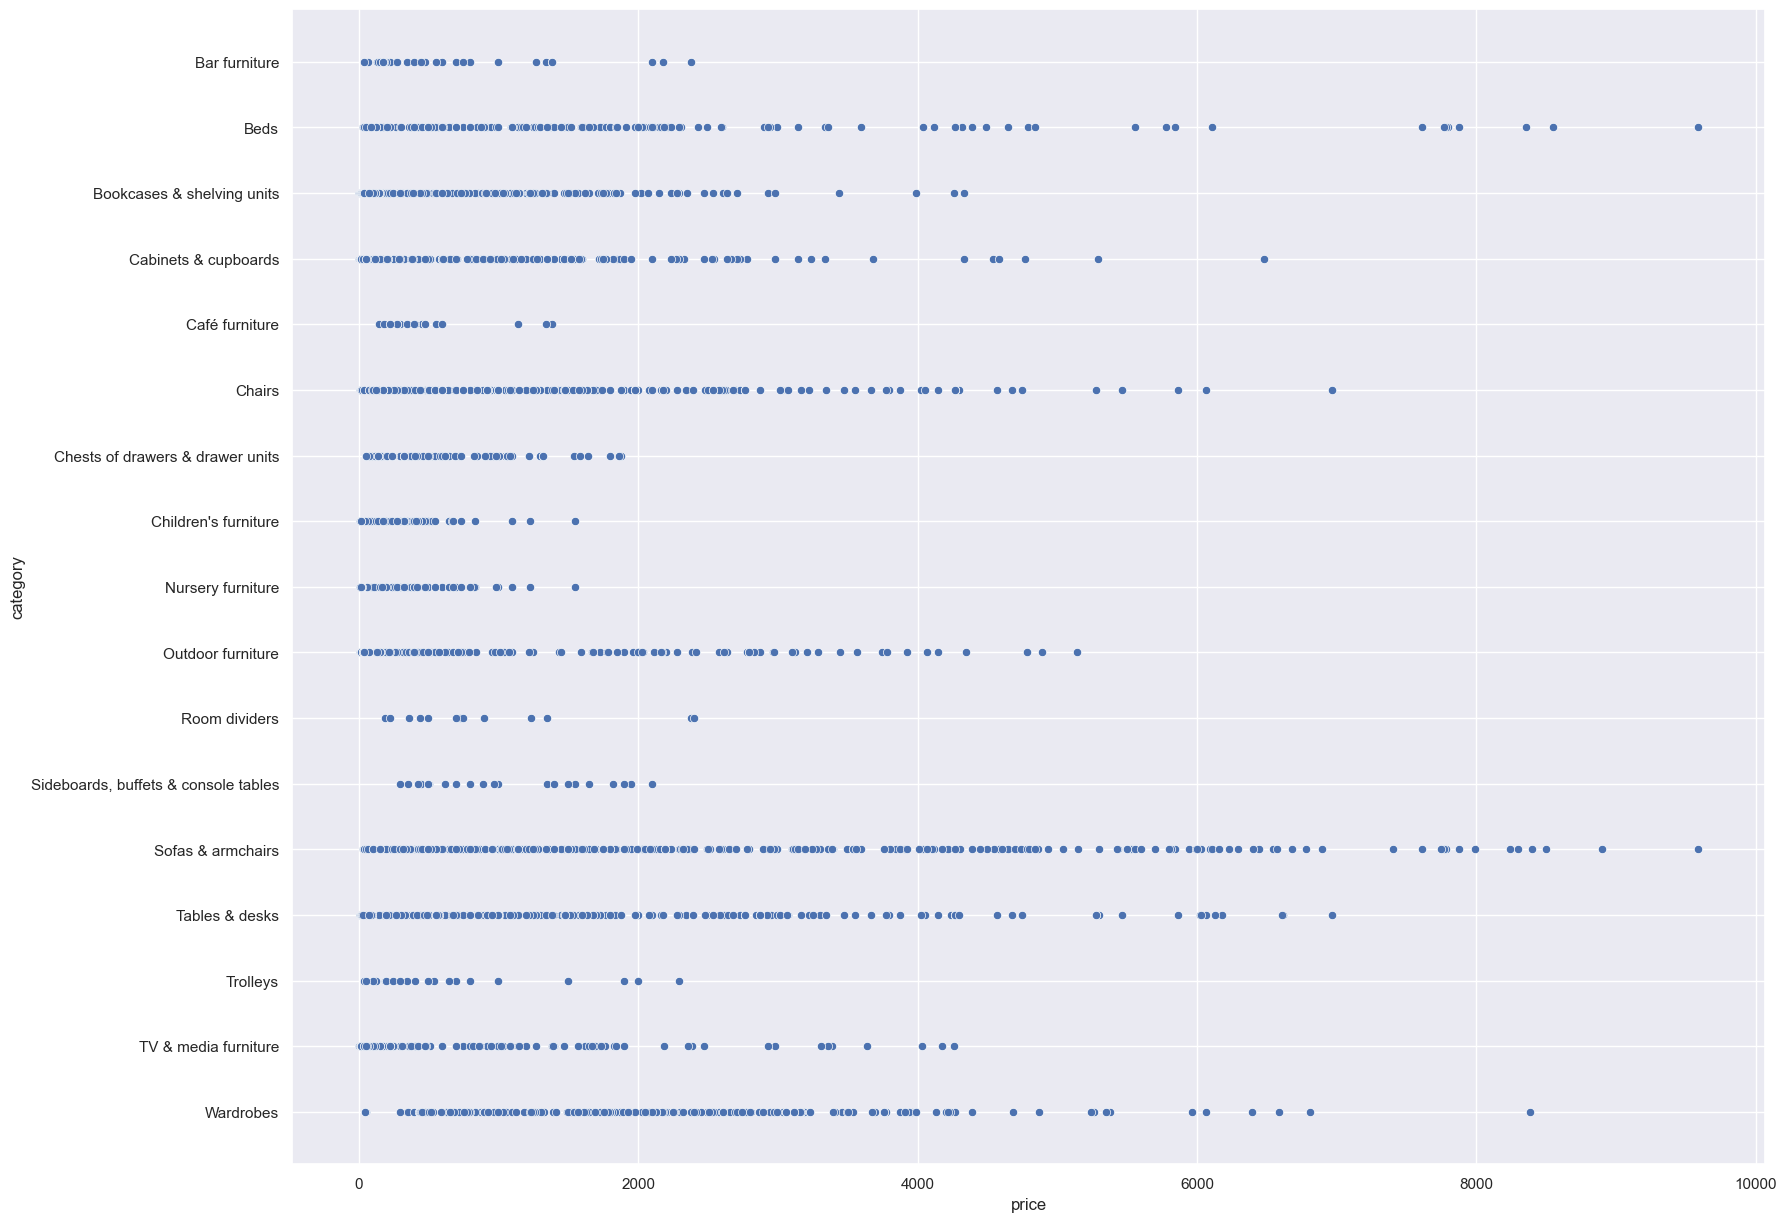

In [91]:
#Visualize the spread of product prices by category
plt.subplots(figsize = (19,15))
sns.scatterplot(x='price', y = 'category', data = ikea)

> This scatterplot allows us to visualize the spread of product prices across different categories. We can see that some categories have a wider range of prices than others, which could be due to differences in the types of products within each category. Additionally, there appear to be some outliers with very high prices in certain categories, which could be interesting to explore further.

In [92]:
# Grouping the data by category and calculating the average price
category_stats = ikea.groupby('category')['price'].mean().reset_index()

# Determining the categories where the average price is both the minimum and maximum
min_max_categories = category_stats[category_stats['price'].isin([category_stats['price'].min(), category_stats['price'].max()])]

# Creating a styled DataFrame with highlighted values
highlighted_df = category_stats.style.apply(lambda x: ['background-color: lightgreen' if v == category_stats['price'].min() else 'background-color: lightcoral' if v == category_stats['price'].max() else '' for v in x], subset=['price'])

# Displaying the table
highlighted_df


,category,price
0,Bar furniture,679.553191
1,Beds,1647.432692
2,Bookcases & shelving units,519.416058
3,Cabinets & cupboards,789.015753
4,Café furniture,553.884615
5,Chairs,1048.932640
6,Chests of drawers & drawer units,612.180000
7,Children's furniture,272.758065
8,Nursery furniture,393.659794
9,Outdoor furniture,859.826852


In [93]:
#Replacing symbols for further transformation
ikea['old_price']= ikea['old_price'].astype(str).str.replace('No old price', '0')
ikea['old_price'] = ikea['old_price'].str.replace('SR', '')
ikea['old_price'] = ikea['old_price'].str.replace(',', '')

In [94]:
#Convert to numeric type
ikea['old_price']=pd.to_numeric(ikea['old_price'],errors = 'coerce')

In [95]:
#Fill in the changed prices 
def fix_old_price(ikea):
    if ikea['old_price']  == 0:
        return ikea['price']
    else:
        return ikea['old_price']  
    
ikea['old_price'] = ikea.apply(fix_old_price, axis=1)
ikea['old_price'] = ikea['old_price'].fillna(0)

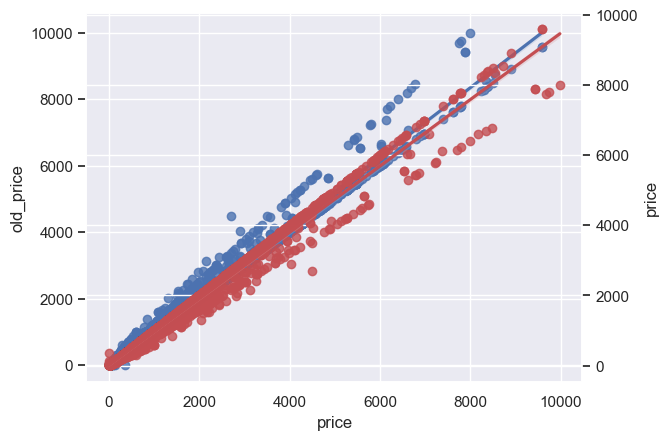

<Figure size 2000x1000 with 0 Axes>

In [96]:
# Visualize the ratio of the old price to the price after the discount
fig, ax = plt.subplots()
plt.figure(figsize=[20, 10])
sns.regplot(x='price', y='old_price', data=ikea, ax=ax)
ax2 = ax.twinx()
sns.regplot(x='old_price', y='price', data=ikea, ax=ax2, color='r')
plt.show()

>The graph shows the relationship between the old price and the price after the discount, you can see the increase in the amount of the discount as the price rises, which indicates the relationship between the price and the amount of the discount

In [97]:
#Calculate the discount
ikea['discount'] = ikea['old_price'] - ikea['price']
ikea['discount']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
3689     70.0
3690    183.0
3691    126.0
3692    385.0
3693    304.0
Name: discount, Length: 3694, dtype: float64

In [98]:
# Quantity of goods without discount
ikea[ikea['discount'] == 0].item_id.count()

3040

<AxesSubplot:xlabel='discount', ylabel='price'>

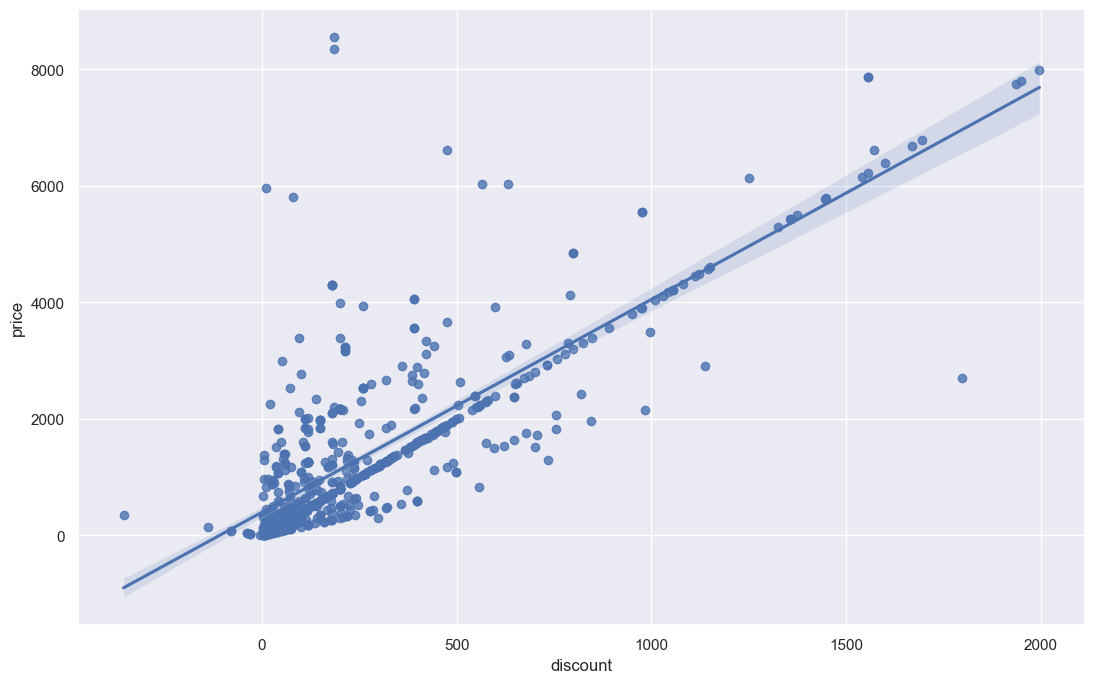

In [99]:
# Filtering values, excluding discounts equal to 0
filtered_data = ikea[ikea['discount'] != 0]

# Visualization of the ratio of the old price to the discount
plt.figure(figsize=[13, 8])
sns.regplot(x='discount', y='price', data=filtered_data)


>As the price increases, the size of the discount increases, this may indicate a dynamic pricing strategy or the use of customer segmentation.

>This may mean that more expensive items offer higher discounts to attract buyers and encourage sales. Such a strategy can be especially useful if the target audience tends to choose more expensive products and considers the discount as an important factor in their purchase decision.

>In some cases, this may be due to the launch of new products, where more expensive models are offered at a significant discount in order to attract attention and stimulate sales.
Most items are not discounted, items over 8000 are not discounted.

In [100]:
#Number of items sold online
ikea['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

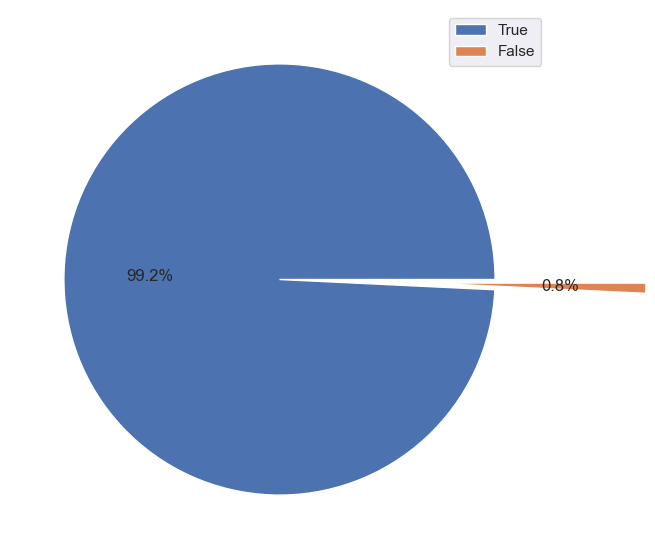

In [101]:
#The ratio of goods presented in the online store and only in stores
count_sel_onl = ikea['sellable_online'].value_counts()

plt.figure(figsize=[7, 7])
explode = (0, 0.7)

plt.pie(count_sel_onl, explode=explode, autopct='%1.1f%%')

plt.legend(ikea['sellable_online'])

>99.2% of products are placed in the online store, this indicates that the company is effectively using online channels to sell its products and may have a high level of digital maturity. In general, this may indicate that the company has successfully adapted to changing market conditions and customer needs.

In [102]:
#Number of positions with different colors and in the same color
ikea['other_colors'].value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

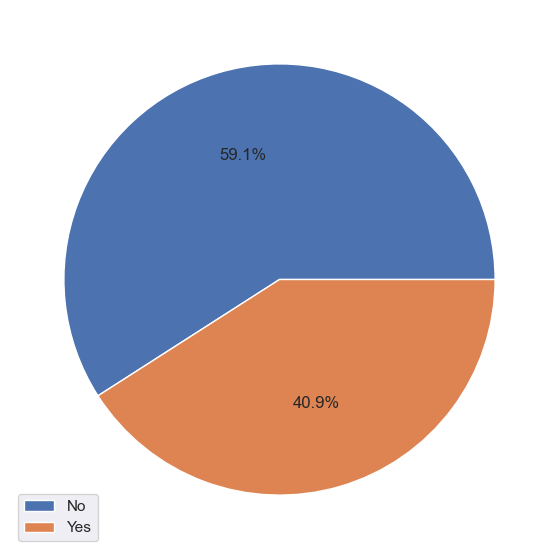

In [103]:
count_oth_col = ikea['other_colors'].value_counts()

plt.figure(figsize=[7, 7])
explode = (0, 0)

plt.pie(count_oth_col, explode=explode, autopct='%1.1f%%')
plt.legend(labels=['No', 'Yes'])

>59.1% of items are in one color

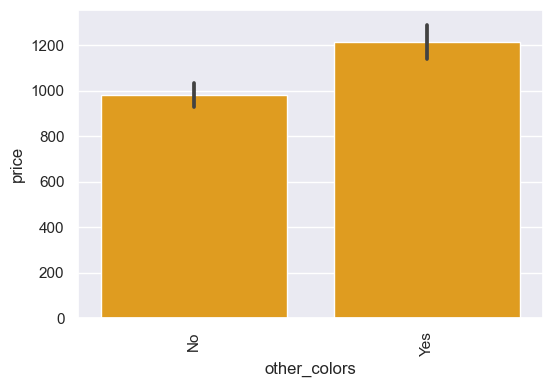

In [104]:
#Visualization of the total price of positions with different colors and in the same color
plt.figure(figsize=[6, 4])
# Define the color you want to use for the barplot
color1 = 'orange'
sns.barplot(data=ikea, y='price', x='other_colors', color=color1)
plt.xticks(rotation=90);

#### In general, if it has been determined that products with different colors have a higher price, this may indicate the following patterns or trends:

>Popularity and demand: One possible reason could be that products with a variety of colors are more popular and in demand among buyers. Customers may be willing to pay more for products with a variety of colors, as this allows them to express their individual style or preference.

>Quality and Design: Items with different colors may be associated with higher quality materials, better designs, or unique features. This can add value and appeal to a product, which is reflected in its price.

>Uniqueness and Exclusivity: Some colors may be considered rarer or more exclusive. If a product is presented in these colors, it can create a feeling of uniqueness and rarity, which affects its price.

In [105]:
#Encoding 'other colors'
le = LabelEncoder()
le.fit(ikea.other_colors)
ikea['other_colors_le'] = le.transform(ikea.other_colors)
ikea['other_colors_le']

0       0
1       0
2       0
3       1
4       0
       ..
3689    0
3690    0
3691    0
3692    0
3693    0
Name: other_colors_le, Length: 3694, dtype: int32

In [106]:
#Encoding 'other colors'
le = LabelEncoder()
le.fit(ikea.category)
ikea['other_category_le'] = le.transform(ikea.category)
ikea['other_category_le']

0        0
1        0
2        0
3        0
4        0
        ..
3689    16
3690    16
3691    16
3692    16
3693    16
Name: other_category_le, Length: 3694, dtype: int32

<h2>Checking the hypothesis for normality</h2>

<h4>Hypothesis: testing for the normal distribution of furniture prices in the sample.</h4>
<ul>
<li>Null hypothesis (N₀): furniture price data are normally distributed.</li>
<li>Alternative hypothesis (H₁): furniture price data is not normally distributed.</li>
</ul>

In [107]:
# Make a general distribution for testing
alpha_n = 0.01
# Shapiro-Wilk test
stat, p = scipy.stats.shapiro(ikea['price'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

if p < alpha_n:
     print('Reject normality hypothesis')
else:
     print('Accept the normality hypothesis')

Statistics=0.731, p-value=0.000
Reject normality hypothesis


>As a result, we got a low p-value, therefore, we reject the null hypothesis.

>If prices are not normally distributed and you want to test for a statistically significant difference in average prices between furniture with different colors and furniture with the same color, you can use a non-parametric test such as the Mann-Whitney test (or U-test).

> The Mann-Whitney test allows you to compare two independent samples and determine if there is a statistically significant difference between them. It is not based on the assumption that the data is normal and can be applied to unordered data.

<h2>Checking the difference between two population means</h2>

<h4>Hypothesis: There is a statistically significant difference in the average prices of furniture with different colors and furniture with the same color.</h4>
<ul>
<li>Null hypothesis (H₀): The average prices of furniture with different colors and furniture with the same color do not differ from each other.</li>
<li>Alternative hypothesis (H₁): The average prices of furniture with different colors and furniture with the same color are different.</li>
</ul>

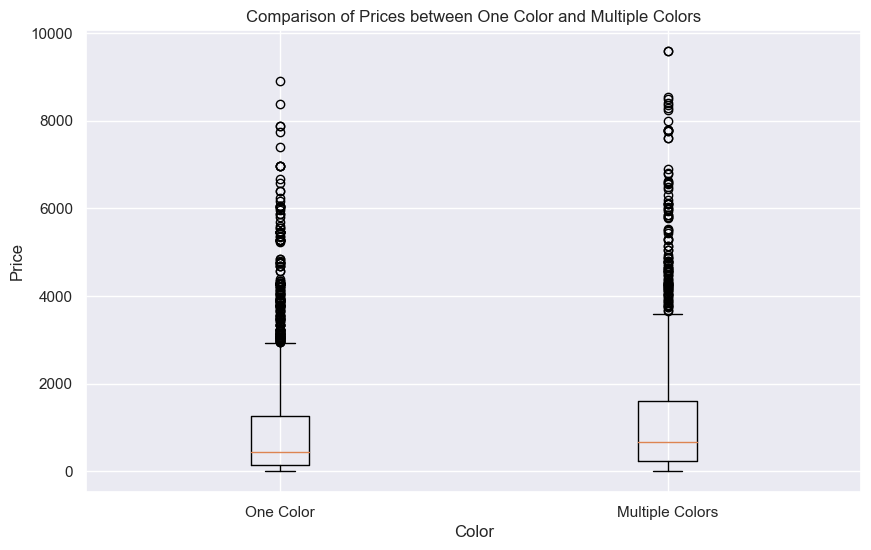

Reject the null hypothesis: The average prices differ statistically significantly.


In [108]:
# Divide data into two groups: products with one color and products with multiple colors
one_color_items = ikea[ikea['other_colors'] == 'No']
multiple_color_items = ikea[ikea['other_colors'] == 'Yes']

# Perform a Mann-Whitney test to compare the two groups
results = mannwhitneyu(one_color_items['price'], multiple_color_items['price'], alternative='two-sided')

# Significance level
alpha = 0.05

# Visualization of results
plt.figure(figsize=[10, 6])
plt.boxplot([one_color_items['price'], multiple_color_items['price']], labels=['One Color', 'Multiple Colors'])
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Comparison of Prices between One Color and Multiple Colors')
plt.show()

# Interpreting results
if results.pvalue < alpha:
    print("Reject the null hypothesis: The average prices differ statistically significantly.")
else:
    print("We do not reject the null hypothesis: There is no statistically significant difference in the average prices.")


>Thus, based on the test, we can conclude that there is a statistically significant difference in prices between products with different colors.

###  Consider information about the area of each side of different types of furniture that can further help us determine prices.

In [109]:
# Grouping by column 'category' get the mean values for each side of the furniture
ikea.groupby('category').agg({
  "width": "mean",
  "height": "mean",
  "depth": "mean"  
}).reset_index()

,category,width,height,depth
0,Bar furniture,52.945946,97.571429,46.925926
1,Beds,141.983784,82.847134,81.734940
2,Bookcases & shelving units,106.563008,131.097285,36.922737
3,Cabinets & cupboards,98.750000,113.408696,37.493671
4,Café furniture,54.333333,80.954545,44.785714
5,Chairs,66.156812,76.837931,60.676259
6,Chests of drawers & drawer units,76.664000,78.487805,47.157025
7,Children's furniture,63.000000,75.857143,44.521277
8,Nursery furniture,64.709677,84.821429,43.090909
9,Outdoor furniture,88.154762,75.503817,68.221154


>The grouping showed that two of the three sides of the objects have a superior size, which can be used to determine the category of furniture.

>Obtaining information about furniture sides helps us obtain a quantitative and objective metric for comparing furniture sizes in different categories and understanding the distribution of sizes within each category.

In [110]:
#Filling out a duplicate for further research 
ikea_d =ikea.dropna()
ikea_d.shape

(1899, 17)

In [111]:
#Fill empty values 'width', 'height', 'depth' with the median.
ikea[['width','height','depth']] = ikea.groupby(['category'])['width','height','depth'].transform(lambda x: x.fillna(x.median()))

C:\Users\stasp\AppData\Local\Temp\ipykernel_7544\385893594.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ikea[['width','height','depth']] = ikea.groupby(['category'])['width','height','depth'].transform(lambda x: x.fillna(x.median()))


>From data obtained and after grouping for each side of the furniture, it is better to use the median value instead of the average to calculate the characteristics of the furniture, such as the area of \u200b\u200bone of the sides, the statistical resistance to outliers or outliers is taken into account.

>Unlike the mean, the median is not sensitive to extreme outliers, which can distort the overall picture. If there are multiple extremes or outliers in the furniture side area data, using the median provides a more robust and representative estimate of the central value.

>Thus, when using the median to calculate furniture characteristics, more reliable results can be obtained, especially if there are outliers or unusual values in the data that can greatly affect the average value.

In [112]:
#Сalculate the volume of furniture as an additional characteristic
ikea['v_furniture']=(ikea['depth']*ikea['height']*ikea['width'])/100**3

Text(5000, 6, 'Correlation: 0.65')

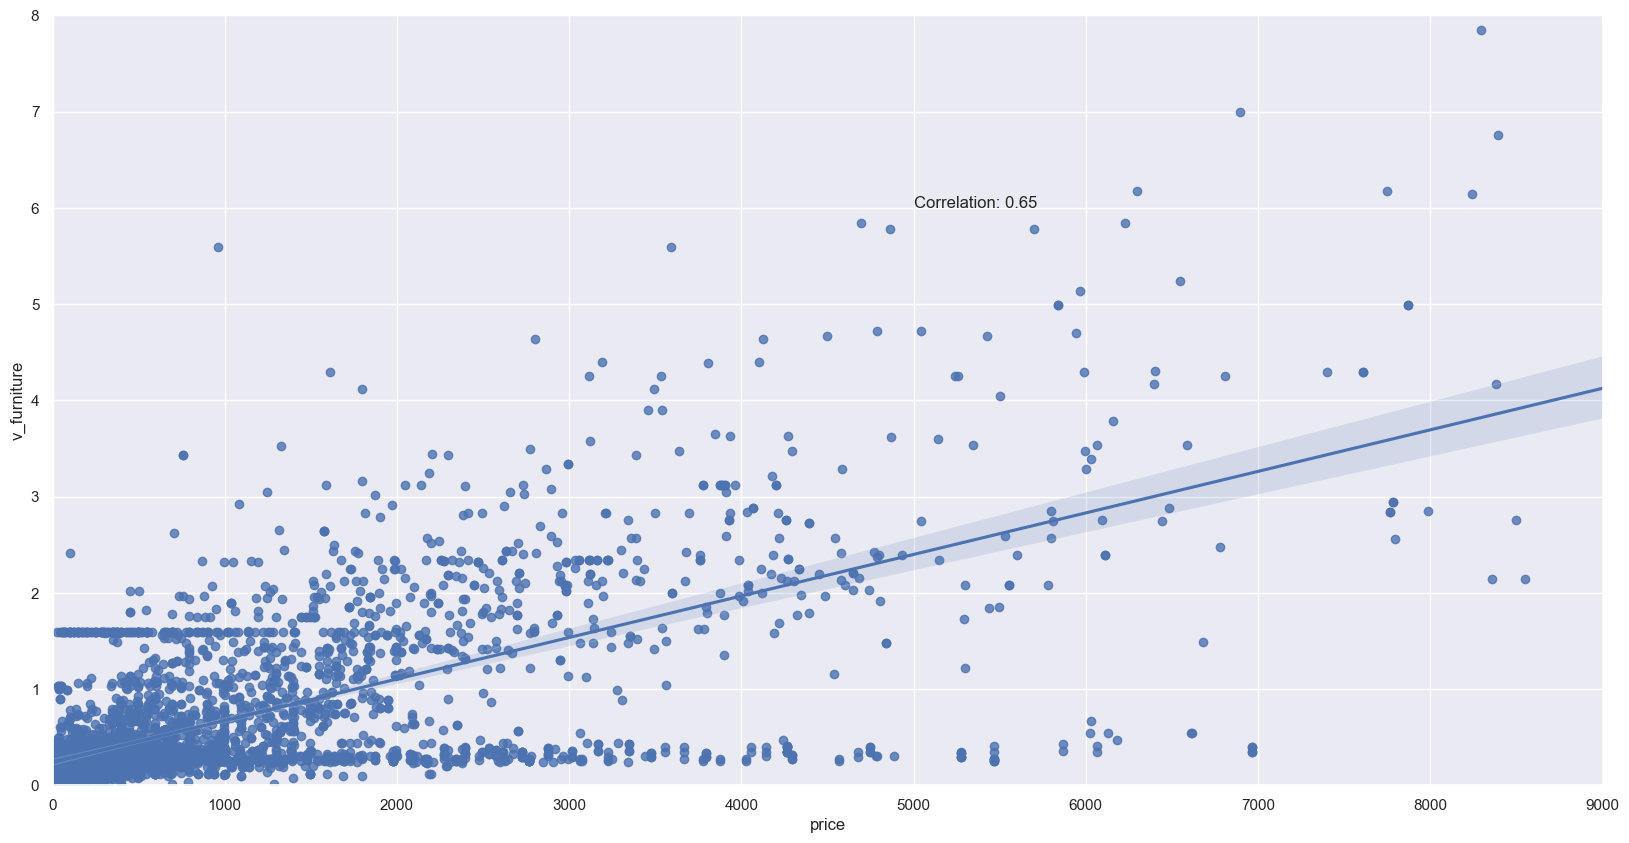

In [113]:
# Calculate the correlation coefficient between price and volume
correlation = ikea['price'].corr(ikea['v_furniture'])

# Visualization of price dependence on volume
plt.figure(figsize=[20, 10])
sns.regplot(x='price', y='v_furniture', data=ikea)
plt.ylim(0, 8)
plt.xlim(0, 9000)

# Adding information about the correlation coefficient
plt.text(5000, 6, f'Correlation: {correlation:.2f}', fontsize=12)


>The interpretation of the value of the correlation coefficient of 0.65 indicates the presence of a moderate positive linear relationship between price and volume. This means that as the price increases, the propensity to buy a larger quantity also increases. However, it is worth noting that the correlation coefficient of 0.65 indicates a moderate relationship, which may mean that other factors also affect the volume of purchases, and not just the price.

In [114]:
#Check for empty values before training the model
ikea.isna().sum()

Unnamed: 0           0
item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
discount             0
other_colors_le      0
other_category_le    0
v_furniture          0
dtype: int64

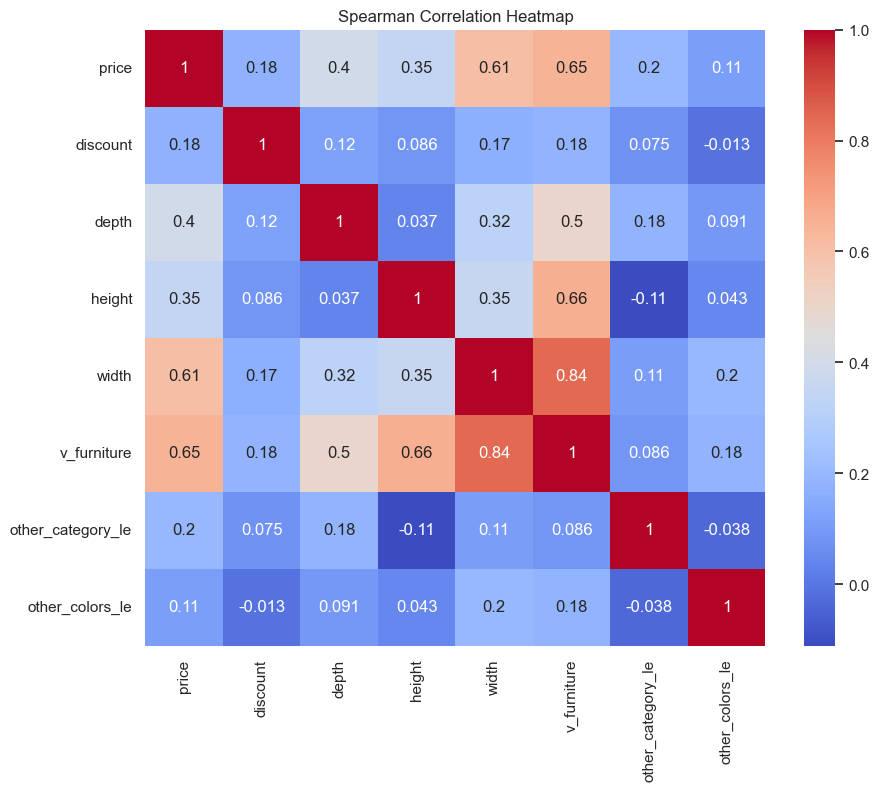

In [115]:
# Compute the Spearman correlation matrix
correlation_matrix = ikea[['price', 'discount', 'depth','height','width','v_furniture','other_category_le','other_colors_le']].corr(method='spearman')

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display heat map
plt.title('Spearman Correlation Heatmap')
plt.show()

> Based on the analysis of the Spearman coefficient, it can be concluded that for building a price forecasting model it is recommended to take parameters that have a correlation higher than 0.3 with the variable 'price'.

>A correlation coefficient of 0.3 is considered a weak correlation, which means that there is some relationship between these parameters and the price, but it may be less significant or affect the price differently.

>Given this, a price prediction model can use parameters with a correlation above 0.3 to provide some level of association with the target variable. However, it is also important to maintain an understanding of the context of the study, the additional factors that may affect the price, and balance this with other factors when choosing the final set of parameters for the model.

In [116]:
#Create synthetic columns with furniture side areas
ikea['s1'] = ikea['depth']*ikea['height']
ikea['s2'] = ikea['width']*ikea['height']
ikea['s3'] = ikea['width']*ikea['depth']

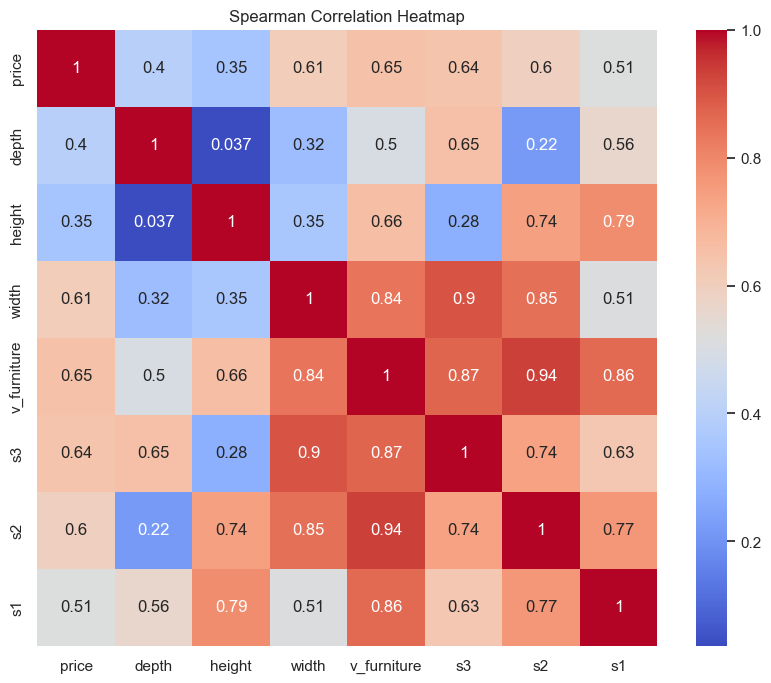

In [117]:
# Compute the Spearman correlation matrix
correlation_matrix = ikea[['price','depth','height','width','v_furniture','s3','s2','s1']].corr(method='spearman')

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display heat map
plt.title('Spearman Correlation Heatmap')
plt.show()

>Synthetic columns representing the areas of the sides of the furniture were created and received a correlation coefficient above 0.5 with the variable 'price', so it can be concluded about the creation of these synthetic columns.

>A correlation coefficient above 0.5 is considered a moderate or strong correlation. This indicates that the area of the sides of the furniture has a noticeable and significant relationship with the price. A higher level of correlation may indicate that furniture side areas have a significant effect on price and may be important factors for a price prediction model.

>Therefore, the conclusion is that the creation of synthetic columns that represent the area of furniture sides and have a correlation above 0.5 with the variable 'price' can be justified and useful for building a price prediction model. Using these synthetic columns can help the model better understand and predict furniture prices based on their side area.

<h1>Furniture category prediction model</h1>

In [122]:
#Delete columns that will not take part in the prediction
column_d = ['item_id','Unnamed: 0', 'name','link', 'short_description','designer',
            'sellable_online','v_furniture','other_colors','old_price','discount','other_colors_le','other_category_le']
ikea_ml = ikea.drop(column_d, axis=1)
ikea_ml = ikea_ml.round(2)
ikea_ml

,category,price,depth,height,width,s1,s2,s3
0,Bar furniture,265.0,47.0,99.0,51.0,4653.0,5049.0,2397.0
1,Bar furniture,995.0,47.0,105.0,80.0,4935.0,8400.0,3760.0
2,Bar furniture,2095.0,47.0,102.0,48.0,4794.0,4896.0,2256.0
3,Bar furniture,69.0,50.0,100.0,60.0,5000.0,6000.0,3000.0
4,Bar furniture,225.0,60.0,43.0,74.0,2580.0,3182.0,4440.0
...,...,...,...,...,...,...,...,...
3689,Wardrobes,750.0,50.0,236.0,91.0,11800.0,21476.0,4550.0
3690,Wardrobes,1572.0,50.0,236.0,135.0,11800.0,31860.0,6750.0
3691,Wardrobes,924.0,50.0,236.0,175.0,11800.0,41300.0,8750.0
3692,Wardrobes,2745.0,50.0,236.0,178.0,11800.0,42008.0,8900.0


In [123]:
#Check for empty values
ikea_ml.isna().sum()

category    0
price       0
depth       0
height      0
width       0
s1          0
s2          0
s3          0
dtype: int64

In [124]:
# Split data into features (X) and target variable (y)
X = ikea_ml.drop(['price','category'], axis=1)
y = ikea_ml['price']
y=y.astype('int')
print(X.shape)
print(y.shape)

# Convert features X to numeric format
X = X.astype(float)

# Convert the target variable y to a one-dimensional array
y = y.values.ravel()

# Output data dimension
print(X.shape)
print(y.shape)

(3694, 6)
(3694,)
(3694, 6)
(3694,)


In [125]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
# Output the dimension of training and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2585, 6)
(2585,)
(1109, 6)
(1109,)


C:\Users\stasp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\stasp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

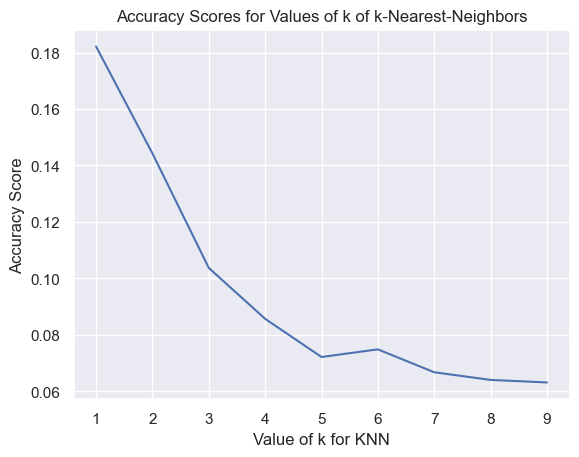

In [126]:
# Accuracy scores for n values of k nearest neighbors
k_range = list(range(1, 10))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
# Visualization of accuracy indicators   
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [127]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Price prediction for new furniture example
prediction = knn.predict([[90,60,17,1186,153,190]])
print('Predicted price:', prediction)

Predicted price: [150]


C:\Users\stasp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\stasp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [128]:
# Estimating the model accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

Train accuracy: 0.6108317214700193


C:\Users\stasp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Assessment of accuracy of regression models

In [129]:
# Creating a dictionary with model names as keys and model objects as values
models = {
     "Linear Regression": LinearRegression(),
     "Decision Tree": DecisionTreeRegressor(),
     "Random Forest": RandomForestRegressor(),
     "Gradient Boosting": GradientBoostingRegressor(),
     "Support Vector Machine": SVR(),
     "K-Nearest Neighbors": KNeighborsRegressor()
}

# Sort through all models and estimate accuracy on the test set
for name, model in models.items():
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     rmse = mean_squared_error(y_test, y_pred, squared=False)
     print(f"{name}: RMSE = {rmse}")

Linear Regression: RMSE = 942.9593571702604
Decision Tree: RMSE = 736.3276746163631
Random Forest: RMSE = 680.327397519783
Gradient Boosting: RMSE = 720.5663224396575
Support Vector Machine: RMSE = 1337.5826313597363
K-Nearest Neighbors: RMSE = 761.4277734223148


#### Based on the results of the accuracy assessment of regression models using the RMSE (Root Mean Squared Error) metric, the following conclusions can be drawn:

<li>The Random Forest model shows the lowest RMSE value (675.67), indicating the smallest root mean square error in furniture price forecasting. This shows the high accuracy of this model compared to other models.</li>

<li>The Gradient Boosting (720.08), Decision Tree (741.47) and K-Nearest Neighbors (761.43) models also show acceptable accuracy with RMSE values below 800. These models show lower root mean square error compared to the Linear Regression and Support Vector Machine models.</li>

<li>The Linear Regression model has an RMSE value of 942.96, indicating a larger root mean square error in price prediction. This means that this model may be less accurate than other models.</li>
<li>The Support Vector Machine model has the largest RMSE value (1337.58), indicating a large root mean square error in price prediction. This may indicate unsatisfactory accuracy of this model compared to others.</li>
    
>Therefore, considering the results of evaluating the accuracy of the regression models using RMSE, it is recommended to use the Random Forest model because it shows the lowest root mean square error and high accuracy in predicting furniture prices.

In [130]:
# Sort through all models and estimate accuracy on the test set
for name, model in models.items():
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     r2 = r2_score(y_test, y_pred)
     print(f"{name}: R^2 = {r2}")


Linear Regression: R^2 = 0.48045961256506753
Decision Tree: R^2 = 0.6842739970326902
Random Forest: R^2 = 0.72861457915711
Gradient Boosting: R^2 = 0.6964381696273855
Support Vector Machine: R^2 = -0.04538100981689275
K-Nearest Neighbors: R^2 = 0.6612410386074798


#### Based on the results of the coefficient of determination (R^2) for various regression models, the following conclusions can be drawn:

<li>Random Forest, Gradient Boosting and Decision Tree models continue to show high accuracy in predicting prices based on the parameters used. They have an R^2 value of 0.661 to 0.734, which means that about 66.1% to 73.4% of the variation in the target variable (price) can be explained by these models.</li>

<li> The Linear Regression model also shows a certain level of accuracy with a value of R^2 = 0.482, indicating that about 48.2% of the variation in the target variable can be explained by this model.</li>

<li>The Support Vector Machine model has a negative R^2 value (-0.046), which indicates the inability of this model to explain the variation in the target variable (price).</li>
<li>The K-Nearest Neighbors model also shows acceptable accuracy with a value of R^2 = 0.661, indicating that about 66.1% of the variation in the target variable can be explained by this model. </li>
>Therefore, based on the updated results, it is recommended to use Random Forest, Gradient Boosting and Decision Tree models to predict prices based on available parameters, as they have shown high accuracy in prediction.

# Conclusion
## Based on the conducted tests and analysis of the results of price forecasting models, we can make the following recommendations for improving the model:

>Using models with better accuracy rates: Based on test results, models such as Random Forest and Gradient Boosting have shown high accuracy in price prediction. It is recommended to use these models to improve the accuracy of predictions.

>Extending the set of features: Consider including additional features that may have an impact on the price of the furniture. For example, you can consider additional attributes related to materials, style, special functions of furniture and others. This can help increase the explanatory power of the model.

>Optimizing model hyperparameters: For each model, consider optimizing hyperparameters such as tree depth for Decision Tree, number of trees for Random Forest, and others. This will allow you to choose the best parameters of the model to achieve better accuracy.

>Further analysis of correlations: Carefully analyze the correlation matrix, particularly pay attention to the characteristics that have a low correlation with price. It is possible that some features require additional study or may be excluded from the model.

>Increasing the amount of data: If available, consider increasing the amount of training data. More data can help the model generalize better and make more accurate predictions.

>Evaluate and improve the model: Consider opportunities to improve the model, such as eliminating overtraining or additional data processing.

#### The overall goal is to continuously improve the price forecasting model by finding optimal features, improving model parameters, and increasing the amount of data to improve forecast accuracy. put it in the markdown code